In [1]:
import pandas as pd 
import numpy as np
import sklearn as sk 

In [2]:
data = pd.read_csv("toy_ds.csv")
print(data.head(), '\n \n ', data.describe())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7   
 
              Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000  

In [3]:
print(data["Sex"].unique())

['M' 'F' 'I']


In [4]:
data.loc[data["Sex"]=='M' , "Sex" ] = 0
data.loc[data["Sex"]=='F' , "Sex" ] = 1
data.loc[data["Sex"]=='I' , "Sex" ] = 2

In [5]:
data["AgeCategory"] = 0
data.loc[data['Rings'] <9, "AgeCategory"] = 1
data.loc[(data['Rings'] >= 9) & (data['Rings'] <= 10), "AgeCategory"] = 2
data.loc[data['Rings'] >10, "AgeCategory" ] = 3
print(data.groupby('AgeCategory').size(), '\n',
sum(data.groupby('AgeCategory').size()))

AgeCategory
1    1407
2    1323
3    1447
dtype: int64 
 4177


In [6]:
data.groupby('AgeCategory').describe()

Diameter       Height       Length        Rings  \
AgeCategory                                                             
1           count  1407.000000  1407.000000  1407.000000  1407.000000   
            mean      0.321276     0.106596     0.420991     6.884151   
            std       0.090292     0.041830     0.111375     1.216914   
            min       0.055000     0.000000     0.075000     1.000000   
            25%       0.260000     0.085000     0.350000     6.000000   
            50%       0.325000     0.105000     0.430000     7.000000   
            75%       0.385000     0.125000     0.500000     8.000000   
            max       0.565000     1.130000     0.720000     8.000000   
2           count  1323.000000  1323.000000  1323.000000  1323.000000   
            mean      0.436754     0.148171     0.560170     9.479214   
            std       0.069540     0.029392     0.085249     0.499757   
            min       0.205000     0.015000     0.280000     9.000000   
            25%       0.395000     0.130000     0.515000     9.000000   
            50%       0.450000     0.150000     0.575000     9.000000   
            75%       0.485000     0.165000     0.620000    10.000000   
            max       0.600000     0.515000     0.770000    10.000000   
3           count  1447.000000  1447.000000  1447.000000  1447.000000   
            mean      0.465695     0.163614     0.591068    13.314444   
            std       0.068473     0.029277     0.083205     2.770863   
            min       0.235000     0.060000     0.310000    11.000000   
            25%       0.420000     0.145000     0.535000    11.000000   
            50%       0.475000     0.165000     0.600000    12.000000   
            75%       0.515000     0.185000     0.650000    15.000000   
            max       0.650000     0.250000     0.815000    29.000000   

                   Shell weight  Shucked weight  Viscera weight  Whole weight  
AgeCategory                                                                    
1           count   1407.000000     1407.000000     1407.000000   1407.000000  
            mean       0.121394        0.198199        0.093357      0.432374  
            std        0.080965        0.147031        0.068090      0.306007  
            min        0.001500        0.001000        0.000500      0.002000  
            25%        0.060000        0.082250        0.040000      0.196000  
            50%        0.106500        0.165000        0.078500      0.368500  
            75%        0.169750        0.282250        0.129250      0.597000  
            max        0.470000        0.825500        0.385500      1.710000  
2           count   1323.000000     1323.000000     1323.000000   1323.000000  
            mean       0.258777        0.416345        0.204731      0.927122  
            std        0.101876        0.194768        0.091182      0.396543  
            min        0.040000        0.045500        0.026000      0.124000  
            25%        0.185000        0.271250        0.139000      0.646000  
            50%        0.259000        0.415000        0.199000      0.917500  
            75%        0.322500        0.539250        0.264500      1.184000  
            max        0.655000        1.253000        0.541000      2.381000  
3           count   1447.000000     1447.000000     1447.000000   1447.000000  
            mean       0.334784        0.463986        0.243350      1.124204  
            std        0.130774        0.217678        0.103497      0.458919  
            min        0.040000        0.041500        0.024000      0.120000  
            25%        0.249000        0.299500        0.166000      0.793500  
            50%        0.324500        0.437000        0.234000      1.092000  
            75%        0.410000        0.598000        0.306000      1.410500  
            max        1.005000        1.488000        0.760000      2.825500

In [7]:
data_use = data.drop('Rings',1)
table1 = data_use.groupby('AgeCategory')

In [9]:
data_FE = data_use
data_FE["Volume"] = data_use["Length"]*data_use["Diameter"]*data_use["Height"]
data_FE["Vol*Weight"] = data_use["Volume"] * data_use["Whole weight"]

In [10]:
X = data_FE.drop('AgeCategory', 1)
Y = data_FE["AgeCategory"].astype('category')

In [11]:
from sklearn.decomposition import PCA 

In [12]:
pca1 = PCA(n_components=7)
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca_score = pca1.explained_variance_ratio_
print(pca_score)

[  7.68208158e-01   2.22884167e-01   3.82917287e-03   2.87195239e-03
   1.01832367e-03   5.00898342e-04   4.12792117e-04]


In [25]:
pca1_comp = PCA(n_components=2)
pca_data1 = pca1_comp.fit_transform(X)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [30]:
log_fit = LogisticRegression().fit(X,Y)
predict_log = log_fit.predict(X)
print(metrics.classification_report(Y,predict_log))
print(metrics.confusion_matrix(Y, predict_log))
print(cross_val_score(log_fit, X,Y,cv= 8).mean())

             precision    recall  f1-score   support

          1       0.67      0.79      0.73      1407
          2       0.52      0.37      0.43      1323
          3       0.66      0.71      0.68      1447

avg / total       0.62      0.63      0.62      4177

[[1116  231   60]
 [ 360  493  470]
 [ 186  233 1028]]
0.621757325071


In [31]:
log_fit_pca = LogisticRegression().fit(pca_data1,Y)
predict_log_pca = log_fit_pca.predict(pca_data1)
print(metrics.classification_report(Y,predict_log_pca))
print(metrics.confusion_matrix(Y, predict_log_pca))
print(cross_val_score(log_fit_pca, pca_data1 ,Y,cv= 8).mean())

             precision    recall  f1-score   support

          1       0.62      0.81      0.70      1407
          2       0.31      0.08      0.13      1323
          3       0.52      0.71      0.60      1447

avg / total       0.48      0.54      0.48      4177

[[1134   93  180]
 [ 436  107  780]
 [ 269  147 1031]]
0.542509292202


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 

In [33]:
KNN = KNeighborsClassifier()
KNN.fit(X,Y)
predict_KNN = KNN.predict(X)

In [34]:
print(metrics.classification_report(Y,predict_KNN))
print(metrics.confusion_matrix(Y, predict_KNN))
print(cross_val_score(KNN, X,Y,cv= 8).mean())

             precision    recall  f1-score   support

          1       0.78      0.85      0.81      1407
          2       0.64      0.66      0.65      1323
          3       0.80      0.71      0.76      1447

avg / total       0.74      0.74      0.74      4177

[[1194  181   32]
 [ 226  871  226]
 [ 110  303 1034]]
0.611947522004


In [35]:

KNN_parameter_tuning1 = pd.DataFrame(data = {'CV': 0,
                                            'Num Neighbors':3}, index = range(1,3,1))
j = 1 # index for number of loops 
for num_neighbors in range(3, 40, 1):
    KNN_sample = KNeighborsClassifier(n_neighbors = num_neighbors)
    CV = cross_val_score(KNN_sample, X,Y,cv= 8).mean()
    KNN_parameter_tuning1.loc[j] = [CV, num_neighbors]
    j = j+1 


In [36]:
KNN_PT1_df = KNN_parameter_tuning1.sort_values(by = "CV", ascending= False )
print(KNN_PT1_df.head(10), "\n \n ", KNN_PT1_df.describe())

          CV  Num Neighbors
21  0.637072           23.0
18  0.634919           20.0
20  0.634918           22.0
17  0.634915           19.0
16  0.634443           18.0
25  0.633719           27.0
24  0.633486           26.0
30  0.633247           32.0
22  0.633244           24.0
23  0.633240           25.0 
 
                CV  Num Neighbors
count  37.000000      37.000000
mean    0.628697      21.000000
std     0.010287      10.824355
min     0.588248       3.000000
25%     0.629424      12.000000
50%     0.632049      21.000000
75%     0.633240      30.000000
max     0.637072      39.000000


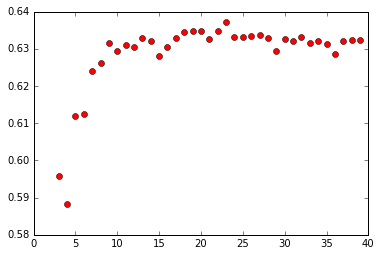

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(KNN_PT1_df['Num Neighbors'], KNN_PT1_df['CV'], 'ro')

In [41]:
X1 = preprocessing.normalize(X)
KNN1 = KNeighborsClassifier(n_neighbors=23)
KNN1.fit(X1,Y)
predict_KNN1 = KNN1.predict(X1)
print(metrics.classification_report(Y,predict_KNN1))
print(metrics.confusion_matrix(Y, predict_KNN1))
print(cross_val_score(KNN1, X1,Y,cv= 8).mean())

             precision    recall  f1-score   support

          1       0.77      0.79      0.78      1407
          2       0.54      0.59      0.57      1323
          3       0.73      0.66      0.69      1447

avg / total       0.68      0.68      0.68      4177

[[1105  245   57]
 [ 245  784  294]
 [  84  412  951]]
0.632764882879


In [43]:
# X.describe()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [45]:
RF = RandomForestClassifier(random_state=1)
RF.fit(X,Y)
predict_RF = RF.predict(X)

In [46]:
print(metrics.classification_report(Y,predict_RF))
print(metrics.confusion_matrix(Y, predict_RF))
print(cross_val_score(RF, X,Y,cv= 5).mean())

             precision    recall  f1-score   support

          1       0.98      0.99      0.98      1407
          2       0.98      0.97      0.97      1323
          3       0.99      0.98      0.98      1447

avg / total       0.98      0.98      0.98      4177

[[1398    5    4]
 [  25 1281   17]
 [   9   22 1416]]
0.609780218836


In [47]:
# index = range(1,5)
# Parameter_df1 = pd.DataFrame({"Numb Features" : 0.1 , "Numb Trees": 0.2, "Min Leaf Size":0.2, "Node Split": 0.3,"CV":0.4},
#                             index= index)

# i = 1 # Track number of iterations and for indexing information 
# for num_est in range(4,12,1):
#     for num_feat in range(1,(len(X.columns)-1)):
#         for min_leaf in range(1,20,4):
#             for min_split in range(2,102,10):
#                 RF_PT = RandomForestClassifier(n_estimators = num_est, max_features = num_feat, min_samples_split= min_split
#                                            ,min_samples_leaf = min_leaf, random_state=1)
#                 # RF_PT.fit(X,Y)
#                 # predict_RF_PT1 = RF_PT.predict(X)
#                 CV = cross_val_score(RF_PT, X,Y,cv= 5).mean()
#                 Parameter_df1.loc[i] = [CV, min_leaf, min_split, num_feat, num_est]
#                 [num_feat, num_est, min_leaf, min_split ,CV]
#                 i = i+1
# Parameter_df1.to_csv("RF_Parameter")

In [48]:
Parameter_df1 = pd.read_csv("RF_Parameter")

In [49]:
len(Parameter_df1)
Parameter_df2 = Parameter_df1.sort_values(by = "CV", ascending = False)
print(Parameter_df2.head(20), "\n \n ", Parameter_df2.describe())

      Unnamed: 0        CV  Min Leaf Size  Node Split  Numb Features  \
2087        2088  0.649757           13.0        72.0            2.0   
2487        2488  0.645927           13.0        72.0            2.0   
648          649  0.645703           17.0        82.0            5.0   
1048        1049  0.645695           17.0        82.0            5.0   
2648        2649  0.642579           17.0        82.0            5.0   
2248        2249  0.642342           17.0        82.0            5.0   
2887        2888  0.642098           13.0        72.0            2.0   
1687        1688  0.641852           13.0        72.0            2.0   
3043        3044  0.641150           17.0        32.0            5.0   
3042        3043  0.641150           17.0        22.0            5.0   
3041        3042  0.641150           17.0        12.0            5.0   
3040        3041  0.641150           17.0         2.0            5.0   
248          249  0.641146           17.0        82.0           

In [50]:
from sklearn.linear_model import LinearRegression 

In [51]:
X_RF = Parameter_df1.drop('CV',1)
Y_RF = Parameter_df1['CV']

In [52]:
RF_Linear_regression = LinearRegression()
RF_Linear_regression.fit(X_RF,Y_RF)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
import statsmodels.api as sm 
SM_OLS = sm.OLS(Y_RF, X_RF)
SM_fit = SM_OLS.fit()
print(SM_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     CV   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     577.8
Date:                Tue, 25 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:45:04   Log-Likelihood:                 12154.
No. Observations:                3200   AIC:                        -2.430e+04
Df Residuals:                    3195   BIC:                        -2.427e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Unnamed: 0       -0.0004   2.65e-07  -1389.526

In [54]:
fig_size = plt.rcParams["figure.figsize"]
print("Current size: ", fig_size)
plt.rcParams["figure.figsize"] = [24,16]

Current size:  [6.0, 4.0]


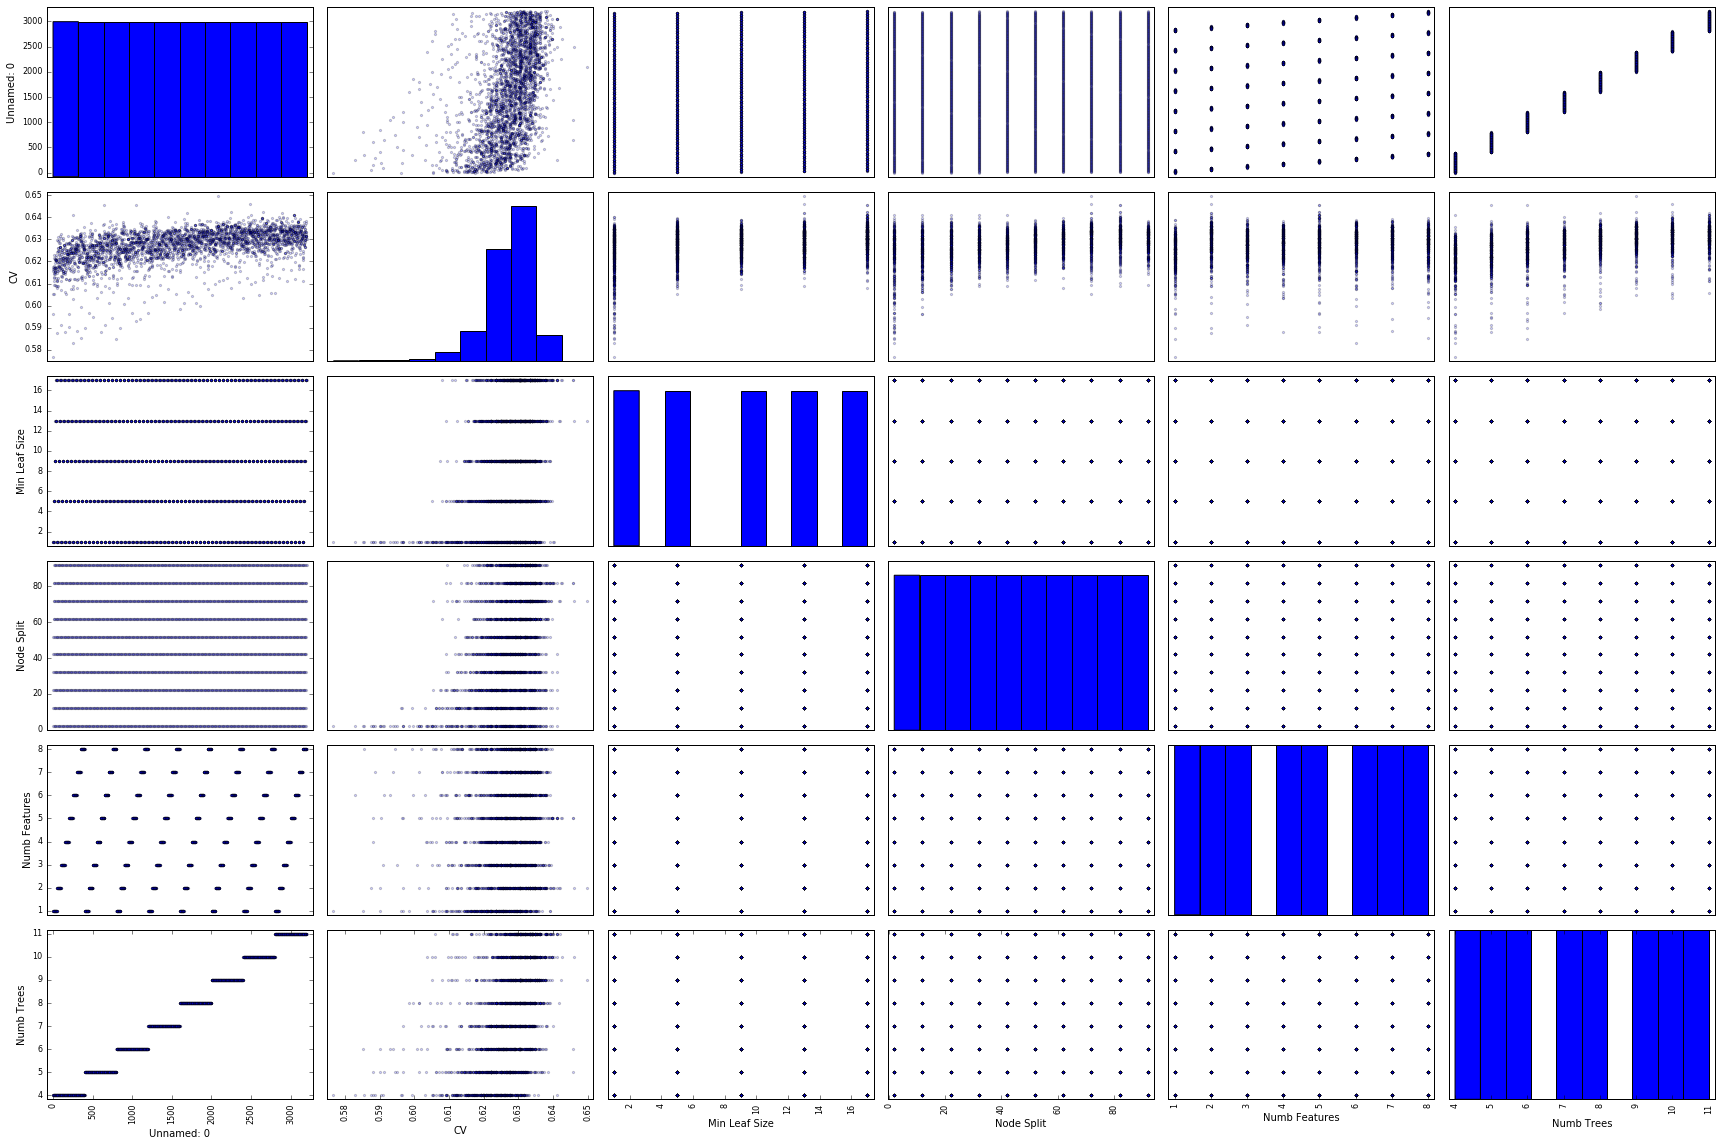

In [68]:
scat_plot = pd.tools.plotting.scatter_matrix(Parameter_df2, alpha = 0.2)
plt.tight_layout()
plt.savefig('scatter.png')

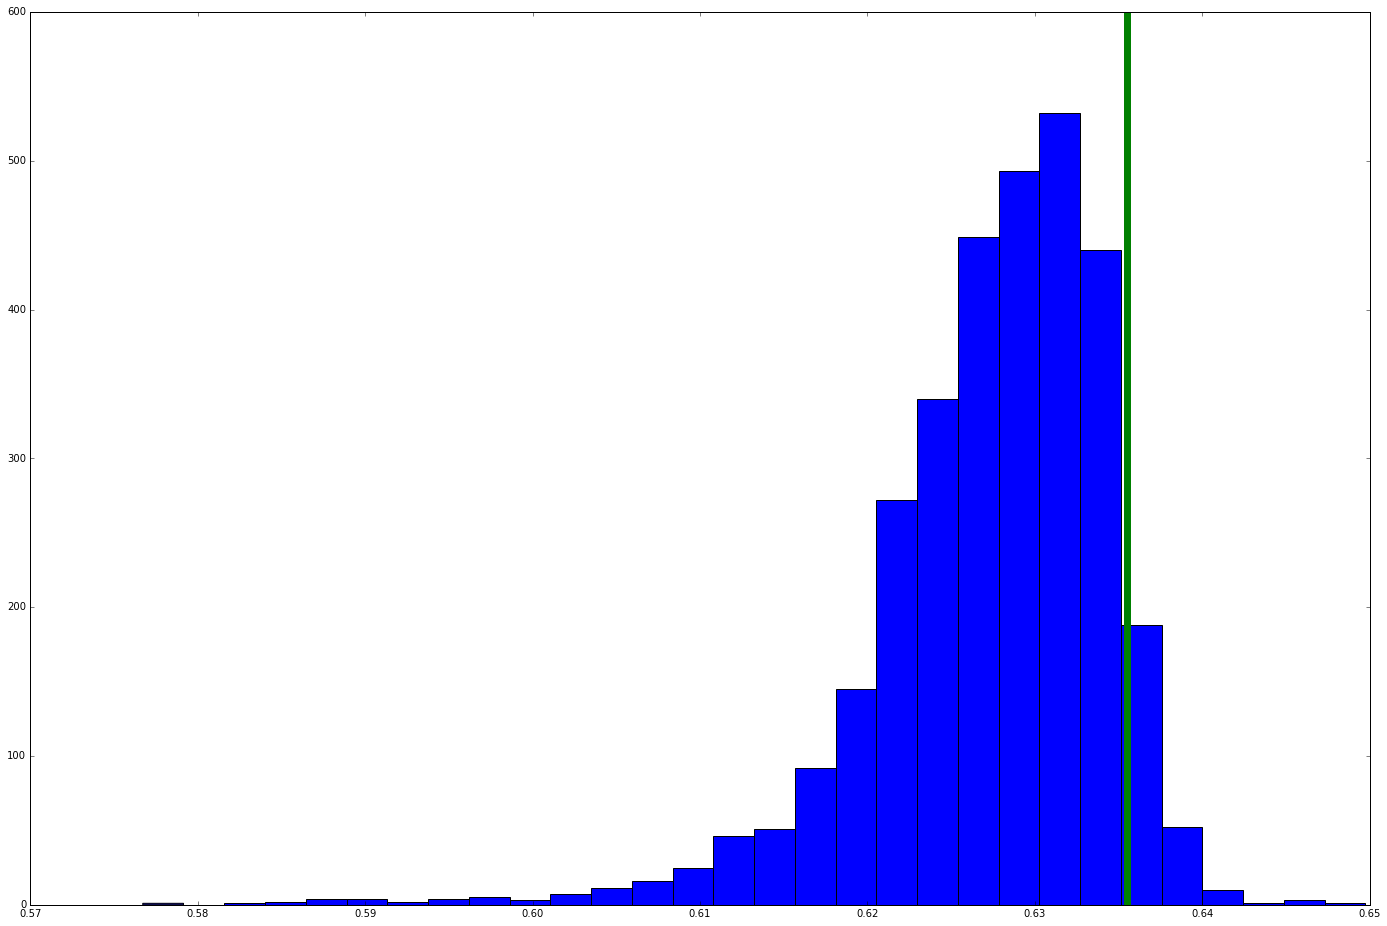

In [69]:
# hist1 = 
plt.hist(Parameter_df2["CV"], bins = 30)
std = np.std(Parameter_df2["CV"])
x_pt = max(Parameter_df2["CV"]) - 2*std 
plt.axvline(x = x_pt, linewidth = 7, color = 'g' )

In [58]:
best_cvs = Parameter_df2[Parameter_df2.CV > (max(Parameter_df2["CV"]) - std )]
best_cvs.describe()

,Unnamed: 0,CV,Min Leaf Size,Node Split,Numb Features,Numb Trees
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1568.500000,0.646771,15.000000,77.000000,3.500000,7.500000
std,862.307177,0.001994,2.309401,5.773503,1.732051,2.380476
min,649.000000,0.645695,13.000000,72.000000,2.000000,5.000000
25%,949.000000,0.645701,13.000000,72.000000,2.000000,5.750000
50%,1568.500000,0.645815,15.000000,77.000000,3.500000,7.500000
75%,2188.000000,0.646885,17.000000,82.000000,5.000000,9.250000
max,2488.000000,0.649757,17.000000,82.000000,5.000000,10.000000


In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [63]:
lda = LinearDiscriminantAnalysis()
lda.fit(X,Y)
lda_predict = lda.predict(X)
print(metrics.classification_report(Y,lda_predict))
print(metrics.confusion_matrix(Y, lda_predict))
cross_val_score(lda,X,Y, cv = 5).mean()


             precision    recall  f1-score   support

          1       0.74      0.75      0.74      1407
          2       0.50      0.57      0.53      1323
          3       0.72      0.63      0.67      1447

avg / total       0.66      0.65      0.65      4177

[[1049  325   33]
 [ 256  755  312]
 [ 116  423  908]]


0.63993643923313481

In [64]:
lda.explained_variance_ratio_

array([  8.94604296e-01,   1.05395704e-01,   1.43283029e-30])

In [70]:
from sklearn.neural_network import MLPClassifier

In [71]:
NN1 = MLPClassifier()
NN1.fit(X,Y)
NN1_predict = NN1.predict(X)
print(metrics.classification_report(Y,NN1_predict))
print(metrics.confusion_matrix(Y, NN1_predict))
print(cross_val_score(NN1, X,Y,cv= 5).mean())

             precision    recall  f1-score   support

          1       0.77      0.75      0.76      1407
          2       0.51      0.54      0.52      1323
          3       0.70      0.68      0.69      1447

avg / total       0.66      0.66      0.66      4177

[[1050  316   41]
 [ 226  716  381]
 [  84  384  979]]
0.648793280616


In [72]:
from sklearn.ensemble import VotingClassifier

In [73]:
eclf1 = VotingClassifier(estimators = [('lr', log_fit), ('rf', RF), ('knn', KNN), ('nn', clf1), ('lda',lda)], voting = 'hard')
eclf2 = VotingClassifier(estimators = [('lr', log_fit), ('rf', RF), ('knn', KNN), ('nn', clf1), ('lda',lda)], voting = 'soft')

eclf1.fit(X,Y)
eclf2.fit(X,Y)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))],
         n_jobs=1, voting='soft', weights=None)

In [76]:
eclf1_predict = eclf1.predict(X)
eclf2_predict = eclf2.predict(X)

print(metrics.classification_report(Y,eclf1_predict))
print(metrics.confusion_matrix(Y, eclf1_predict))
print(cross_val_score(eclf1, X,Y,cv= 5).mean())

print(metrics.classification_report(Y,eclf2_predict))
print(metrics.confusion_matrix(Y, eclf2_predict))
print(cross_val_score(eclf2, X,Y,cv= 5).mean())

             precision    recall  f1-score   support

          1       0.76      0.80      0.78      1407
          2       0.59      0.59      0.59      1323
          3       0.74      0.70      0.72      1447

avg / total       0.70      0.70      0.70      4177

[[1132  244   31]
 [ 231  774  318]
 [ 126  302 1019]]
0.644968100467
             precision    recall  f1-score   support

          1       0.83      0.85      0.84      1407
          2       0.77      0.75      0.76      1323
          3       0.84      0.84      0.84      1447

avg / total       0.81      0.82      0.82      4177

[[1201  160   46]
 [ 150  992  181]
 [  92  142 1213]]
0.649994329692


In [75]:
KNN_PT = KNeighborsClassifier (n_neighbors = 20)
#RF_PT = RandomForestClassifier(n_estimators=10, max_features=4, min_samples_split=60, min_samples_leaf=14)
RF_PT = RandomForestClassifier(n_estimators=9, max_features=5, min_samples_split=72, min_samples_leaf=13)

eclf1_o = VotingClassifier(estimators = [('lr', log_fit) ,('rf', RF_PT), ('knn', KNN_PT), 
                                       ('nn', clf1), ('lda',lda)], voting = 'hard')
eclf2_o = VotingClassifier(estimators = [('lr', log_fit), ('rf', RF_PT), ('knn', KNN_PT), 
                                       ('nn', clf1), ('lda',lda)], voting = 'soft')

print(cross_val_score(eclf1_o, X,Y,cv= 5).mean())
print(cross_val_score(eclf2_o, X,Y,cv= 5).mean())


0.646634151825
0.648793286792
